# Setting up your environment

1. First, install `sentence-transformers`.


In [1]:
!pip install -U sentence-transformers


     |████████████████████████████████| 78 kB 1.8 MB/s eta 0:00:011
     |████████████████████████████████| 3.1 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 3.7 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=59af31ee910e35d254b875d768d79d4ff07aaa0e8f84c04c8f7681ecaf2881b5
  Stored in directory: /Users/tunaz/Library/Caches/pip/wheels/52/19/88/6625593382e23a926740e6fcee0f2df0a0de25766094842a28
Successfully built sentence-transformers
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the

2. Copy the data folder to your own Google Drive, to be able to access it through colab: https://drive.google.com/drive/folders/1cZ8Lsu8r5QC-cHsD4FFrmFimN-HR_HKM

3. Mount your drive 


In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# %load_ext autoreload
# %autoreload 2
# %matplotlib inline


4. Adapt the path to point to the data folder within your Google Drive


In [1]:
# DATA_PATH = '/content/drive/MyDrive/CovidTweets/2021_US_vaccine_tweets_embed'

DATA_PATH = ''

# Interacting with the Notebook


First, we will load the preprocessed data and SBERT. Note that we are using a subset of the unlabeled data so that it fits in colab's memory


In [2]:
import os
import numpy as np

tweet_text = np.load(os.path.join(DATA_PATH, "2021_US_tweets_text.npy"))
tweet_embed = np.load(os.path.join(DATA_PATH, "2021_US_tweets_sbert.npy"))
print(tweet_text.shape, tweet_embed.shape)

(85799,) (85799, 768)


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')


Here is where you can mess with the phrases or add new themes. Make sure to re-run all the cells below whenever you update the phrases. Right now I have it set up so that you can only use one phrase per theme.

In [4]:
#themes are the key, and phrases are the values of the dictionary

# phrases = {"govDistrust": ["lack of trust in the government", "Biden is a failure", "Biden lied people died", "Biden is satan", "Biden is a disgrace", "Government ignores natural immunity because it doesn’t make money"],
#            "vaccineDanger": ["the vaccine will be dangerous to health", "Covid vaccines can cause blood clots", "vaccine represents a greater danger to our children’s health than COVID itself", "experimental covid vaccine death jab"],
#            "covidFake": ["COVID-19 disease does not exist", "covid is a hoax"], 
#            "freedomChoice": ["I do not want to be vaccinated because I have freedom of choice", "my body my choice", "Forcing people to take experimental vaccines is oppression","Vaccine has nothing to do with Covid-19 rather it’s about the vaccine passport and tyranny","vaccine mandate is not constitutional"],
#            "bigPharma": ["the vaccine was created only for the profit of pharmaceutical companies", "Big Pharma is obsessed with vaccine profit"],
#            "naturalImunity": ["natural methods of protection against the disease are better than vaccines", "natural immunity is taking its lead in our path forward"],
#            "vaccineWontWork": ["the vaccine does not work"," Covid-19 vaccines have not been through the same rigorous testing as other vaccines"],
#            "vaccineAgainstReligion": ["vaccines are the mark of the beast", "satan made vaccine","vaccine is haram", "vaccine is not halal", "Vaccine conflicts with my religion", "I will protect my body from a man made vaccine", "Pfizer contains aborted Fetal Tissue", "In God we trust"]
# }


#adding stance 

phrases = {"govDistrust": ["lack of trust in the government", "Biden is a failure", "Biden lied people died", "Biden is satan", "Biden is a disgrace", "Government ignores natural immunity because it doesn’t make money"],
           "govTrust": ["we trust government", "Thanks Biden for the vaccine availability"],
           "bigPharmaAnti": ["the vaccine was created only for the profit of pharmaceutical companies", "Big Pharma is obsessed with vaccine profit"],
           "bigPharmaPro": ["I trust big pharma", "so much misinformation about bigpharma"],
           "vaccineDanger": ["the vaccine will be dangerous to health", "Covid vaccines can cause blood clots", "vaccine represents a greater danger to our children’s health than COVID itself", "experimental covid vaccine death jab"],
           "vaccineSaves": ["vaccine saves life", "vaccine is the way forward to erradicate pandemic"],
           "freedomChoice": ["I do not want to be vaccinated because I have freedom of choice", "my body my choice", "Forcing people to take experimental vaccines is oppression","Vaccine has nothing to do with Covid-19 rather it’s about the vaccine passport and tyranny","vaccine mandate is not constitutional"],
           "vaccineNotOppression": ["Vaccine mandate is not oppression", "vaccine passport is not tyranny"],
           "vaccineAgainstReligion": ["vaccines are the mark of the beast", "satan made vaccine","vaccine is haram", "vaccine is not halal", "Vaccine conflicts with my religion", "I will protect my body from a man made vaccine", "Pfizer contains aborted Fetal Tissue", "In God we trust"],
           "vaccineNotAgainstReligion": ["vaccine is not against religion", "God made vaccine","vaccine is halal"],
           "covidFake": ["COVID-19 disease does not exist", "covid is a hoax"], 
           "covidReal": ["COVID is real", "covid is not a hoax"], 
           "naturalImunityPro": ["natural methods of protection against the disease are better than vaccines", "natural immunity is taking its lead in our path forward",  "embrace Natural immunity"],
           "naturalImunityAnti": ["natural immunity is myth", "natural immunity will not end pandemic"],
           "vaccineWontWork": ["the vaccine does not work"," Covid-19 vaccines have not been through the same rigorous testing as other vaccines","Covid vaccines do not stop the spread"],
           "vaccineWorks": ["vaccine works","vaccine helps"]
           
}

Compute (or recompute) the SBERT embeddings for each phrase

In [5]:
import sys
theme_embeddings = {}
for theme in phrases:
    #print(theme)
    #print(phrases[theme])
    embeddings = []
    for phrase in phrases[theme]:
        #print(phrase)
    #sys.exit()
        embeddings.append(model.encode([phrase])[0])
    theme_embeddings[theme] = embeddings
#print(theme_embeddings)

In [6]:
#theme_embeddings['govDistrust']

Explore tweets that are closest to the phrase embedding. Adapt K to choose how many to print

In [7]:
from scipy.spatial import distance
#print(tweet_embed.shape) #(85799, 768)
#print(tweet_embed[0].shape) #(768,)

In [8]:
from scipy.spatial import distance
theme_tweet_dic = {} 
theme_index_tweetEmbd_dic = {} #for cluster purity calculation

for j in range (0, len(tweet_text)): # all tweets
    min_dis = []; curr_themes = []
    for theme, val in phrases.items(): #16 themes

        #print(theme)
        #print(len(val))
        dis = []
        for i in range (0, len(val)): #phrases in each theme
            dis.append(distance.cdist(tweet_embed[j].reshape(1 , 768), theme_embeddings[theme][i].reshape(1 , 768), 'cosine'))
        min_dis.append(np.array(dis).min(axis=0).item())
        curr_themes.append(theme)

    min_index = np.array(min_dis).argmin(axis=0).item()
    min_dist = min_dis[min_index]
    theme = curr_themes[min_index]
    
    ##visualiaztion dic
    theme_tweet_dic.setdefault(theme, []) #add multiple values to same key dictionary 
    theme_tweet_dic[theme].append((min_dist, tweet_text[j]))  #add multiple values to same key dictionary
    
    ## purity calculation dic
    theme_index_tweetEmbd_dic.setdefault(theme, []) #add multiple values to same key dictionary 
    theme_index_tweetEmbd_dic[theme].append((min_index, tweet_embed[j]))  #add multiple values to same key dictionary



# Sort them
for theme in theme_tweet_dic:
    theme_tweet_dic[theme].sort() 

In [10]:
#calculate cluster purity using Silhouette Coefficient

from sklearn import metrics
from sklearn.metrics import pairwise_distances


labels = [] #Index of the cluster each sample/tweet belongs to.
X = [] # {array-like, sparse matrix} of shape (n_samples, n_features), for our case tweet embedding
for k,v in theme_index_tweetEmbd_dic.items():
    for i in range (0, len(v)):
        labels.append(v[i][0])
        X.append(v[i][1])
purity = metrics.silhouette_score(np.array(X),  np.array(labels), metric='euclidean')
print("cluster purity : ", purity )

cluster purity :  -0.0032597757


In [11]:
K = 10
tweets = [x[1] for x in theme_tweet_dic['freedomChoice'][:K]]

for tw in tweets:
  print(tw)
  print('----')


Vaccine passports for a vaccine that doesn't stop anyone from contracting or spreading covid-19 is nothing be a political agenda towards ryranny. #VaccinePassports #passports #COVID19
----
Regardless Of Union Deals
Or FOP Deals Or Any Bullshit
Court Ruling Or Precedent,
Forced or Mandated Vaccine
Or MandatedPharma Or 
Mandated Covid Testing
Is Unconstitutional &amp; Invasive
Against any Physical &amp; Individual
&amp; Spiritual &amp; Religious Autonomy
&amp; Freedom &amp; Security
----
It’s not about the covid vaccine per se, but the slippery slope vaccine passports create. https://t.co/5VBSGcqOch
----
Vaccine mandates are constitutionally sound. Hope more institutions consider such mandates, because it is well past time to stop pandering to selfish anti-vaxxers (most of whom also tend to be anti-mask and/or COVID denialists). https://t.co/5xygmgsjNK
----
You didn’t need a vaccine passport for influenza, we don’t need one for Covid-19 😒😒
----
Is Biden's vaccine mandate 'unconstitutiona

In [12]:
theme_docs = []
themes = []

K = 100
for theme in theme_tweet_dic:
  theme_tweet_dic[theme].sort()
  theme_tweets = [x[1] for x in theme_tweet_dic[theme][:K]]
  all_text = " ".join(theme_tweets)
  themes.append(theme)
  theme_docs.append(all_text)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

vectorizer = TfidfVectorizer(max_df=0.7, ngram_range = (2,3))

X = vectorizer.fit_transform(theme_docs)
feature_names = vectorizer.get_feature_names()

dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
data = df.transpose()
data.columns = themes

In [13]:
#print(len(theme_docs))

16


You can also visualize the themes. 


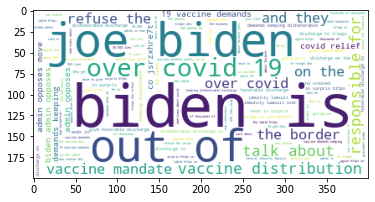

In [14]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['govDistrust'])
plt.imshow(wordcloud)

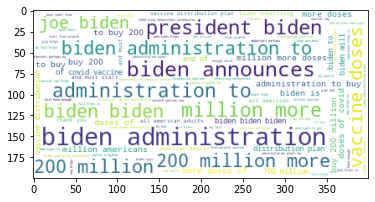

In [15]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['govTrust'])
plt.imshow(wordcloud)

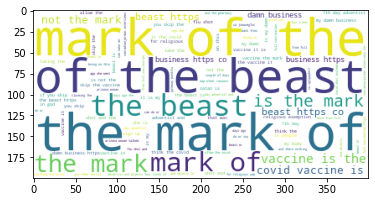

In [16]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineAgainstReligion'])
plt.imshow(wordcloud)

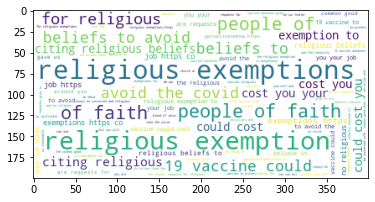

In [17]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineNotAgainstReligion'])
plt.imshow(wordcloud)

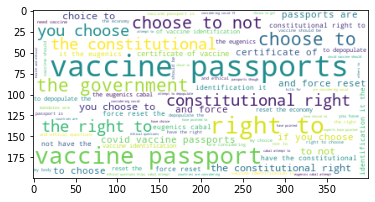

In [18]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['freedomChoice'])
plt.imshow(wordcloud)

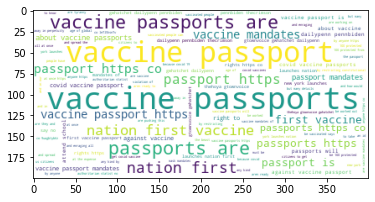

In [19]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineNotOppression'])
plt.imshow(wordcloud)

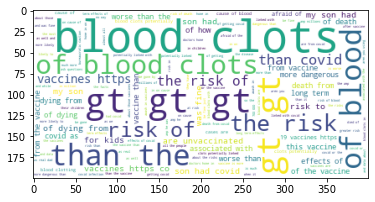

In [20]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineDanger'])
plt.imshow(wordcloud)

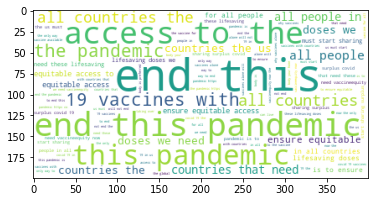

In [21]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineSaves'])
plt.imshow(wordcloud)

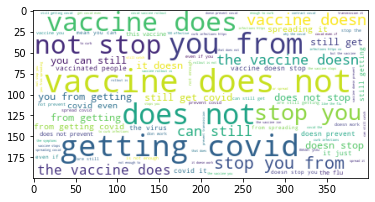

In [22]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineWontWork'])
plt.imshow(wordcloud)

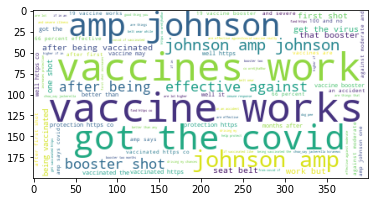

In [23]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['vaccineWorks'])
plt.imshow(wordcloud)

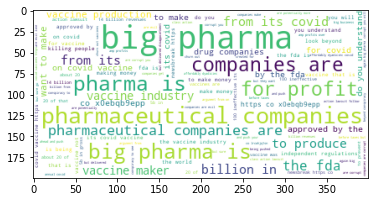

In [24]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['bigPharmaAnti'])
plt.imshow(wordcloud)

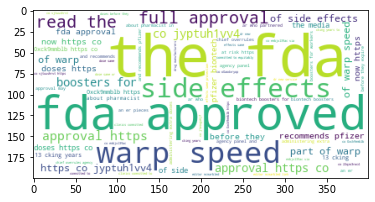

In [25]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['bigPharmaPro'])
plt.imshow(wordcloud)

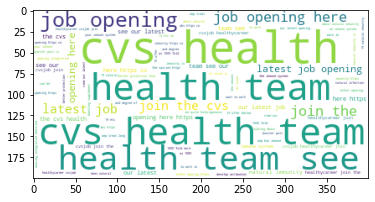

In [26]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['naturalImunityPro'])
plt.imshow(wordcloud)

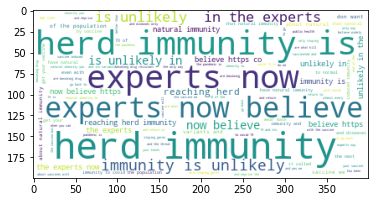

In [27]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['naturalImunityAnti'])
plt.imshow(wordcloud)

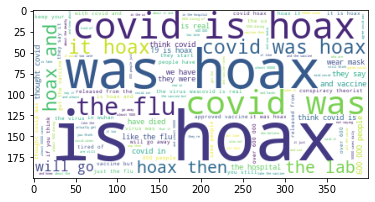

In [28]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['covidFake'])
plt.imshow(wordcloud)

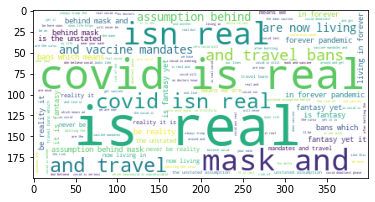

In [29]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(data['covidReal'])
plt.imshow(wordcloud)

# Cluster analysis

1. Calculate cluster purity.
2. Assign threshold based on closest distance (threshold value <= 0.2, 0.3, 0.4, 0.5)
3. Plot bar graph with the number of assigned tweets to each cluster for each threshold
4. TSNE plot for Clusters (themes) for each threshold

In [26]:
from scipy.spatial import distance
theme_index_tweetEmbd_dic = {}
threshold_theme_tweet_dic = {}
for j in range (0, len(tweet_text)): # all tweets
    min_dis = []; curr_themes = []
    for theme, val in phrases.items(): #16 themes

        #print(theme)
        #print(len(val))
        dis = []
        for i in range (0, len(val)): #phrases in each theme
            dis.append(distance.cdist(tweet_embed[j].reshape(1 , 768), theme_embeddings[theme][i].reshape(1 , 768), 'cosine'))
        min_dis.append(np.array(dis).min(axis=0).item())
        curr_themes.append(theme)

    min_index = np.array(min_dis).argmin(axis=0).item()
    min_dist = min_dis[min_index]
    #print(min_dist)
    theme = curr_themes[min_index]
    
    threshold = 0.2
    if min_dist <= threshold: #discard the tweets which has distance > threshold
        theme_index_tweetEmbd_dic.setdefault(theme, []) #add multiple values to same key dictionary 
        theme_index_tweetEmbd_dic[theme].append((min_index, tweet_embed[j]))  #add multiple values to same key dictionary
        
        threshold_theme_tweet_dic.setdefault(theme, []) #add multiple values to same key dictionary 
        threshold_theme_tweet_dic[theme].append((min_dist, tweet_text[j]))  #add multiple values to same key dictionary
    


In [27]:
#calculate cluster purity using Silhouette Coefficient

from sklearn import metrics
from sklearn.metrics import pairwise_distances


labels = [] #Index of the cluster each sample/tweet belongs to.
X = [] # {array-like, sparse matrix} of shape (n_samples, n_features), for our case tweet embedding
assigned_after_th = {}
for k,v in theme_index_tweetEmbd_dic.items():
    assigned_after_th[k]=(len(v))
    for i in range (0, len(v)):
        labels.append(v[i][0])
        X.append(v[i][1])
purity = metrics.silhouette_score(np.array(X),  np.array(labels), metric='euclidean')
print("cluster purity : ", purity )

cluster purity :  0.038152352


In [29]:
print(len(labels))

74


In [30]:
assigned_after_th

{'vaccineNotAgainstReligion': 3,
 'vaccineDanger': 61,
 'vaccineWorks': 1,
 'vaccineWontWork': 2,
 'covidReal': 1,
 'freedomChoice': 2,
 'vaccineNotOppression': 1,
 'govTrust': 2,
 'bigPharmaAnti': 1}

In [32]:
# Assigned clusters without threshold
assigned_before_th = {}
for k,v in theme_tweet_dic.items():
    assigned_before_th[k] = len(v)
    
assigned_before_th

{'vaccineSaves': 6168,
 'govDistrust': 883,
 'govTrust': 7100,
 'bigPharmaAnti': 2592,
 'vaccineDanger': 51417,
 'vaccineNotOppression': 1450,
 'naturalImunityAnti': 380,
 'vaccineWontWork': 6069,
 'covidReal': 1078,
 'freedomChoice': 3778,
 'vaccineAgainstReligion': 2276,
 'bigPharmaPro': 302,
 'vaccineWorks': 650,
 'naturalImunityPro': 131,
 'vaccineNotAgainstReligion': 722,
 'covidFake': 803}

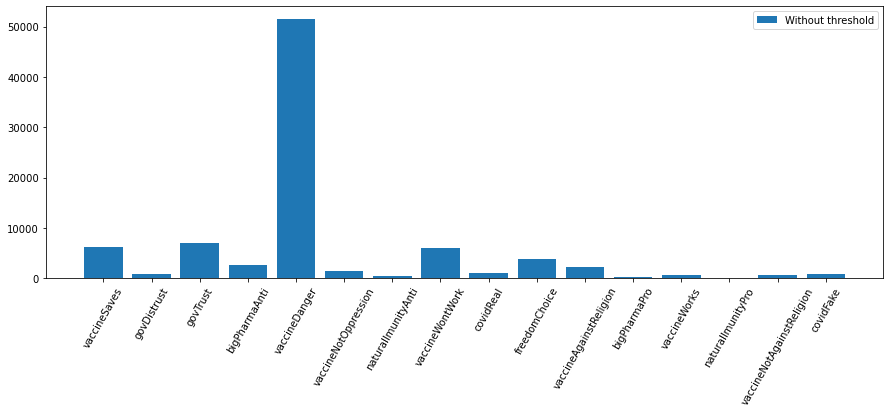

In [31]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
plt.xticks(rotation=60)
plt.bar(assigned_before_th.keys(), assigned_before_th.values(), label = 'Without threshold')
ax.legend(fontsize = 10)
plt.savefig('Without_threshold.png', dpi=300, bbox_inches = "tight") #will not chopped

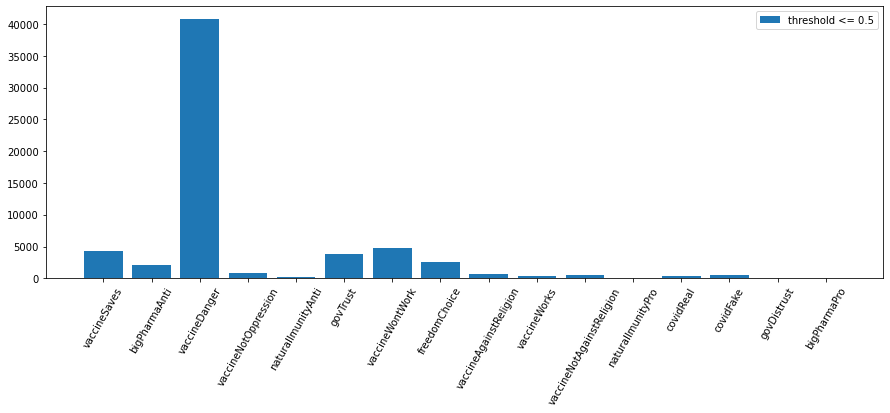

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
plt.xticks(rotation=60)
plt.bar(assigned_after_th.keys(), assigned_after_th.values(), label = 'threshold <= 0.5')
ax.legend(fontsize = 10)
plt.savefig('thr_0.5.png', dpi=300, bbox_inches = "tight") #will not chopped

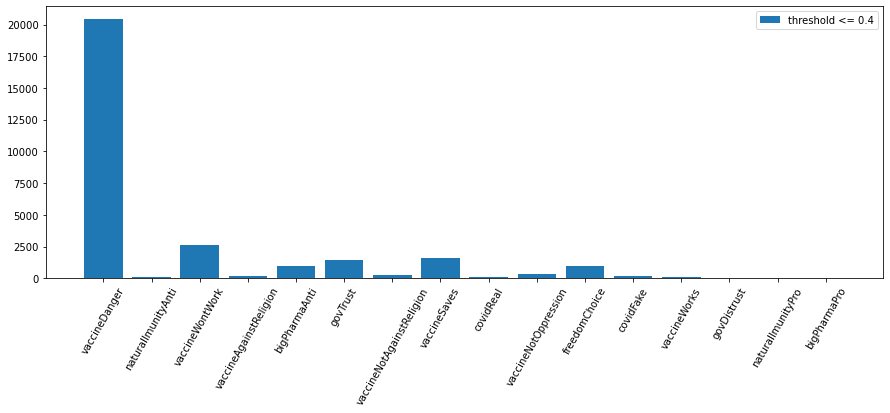

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
plt.xticks(rotation=60)
plt.bar(assigned_after_th.keys(), assigned_after_th.values(), label = 'threshold <= 0.4')
ax.legend(fontsize = 10)
plt.savefig('thr_0.4.png', dpi=300, bbox_inches = "tight") #will not chopped

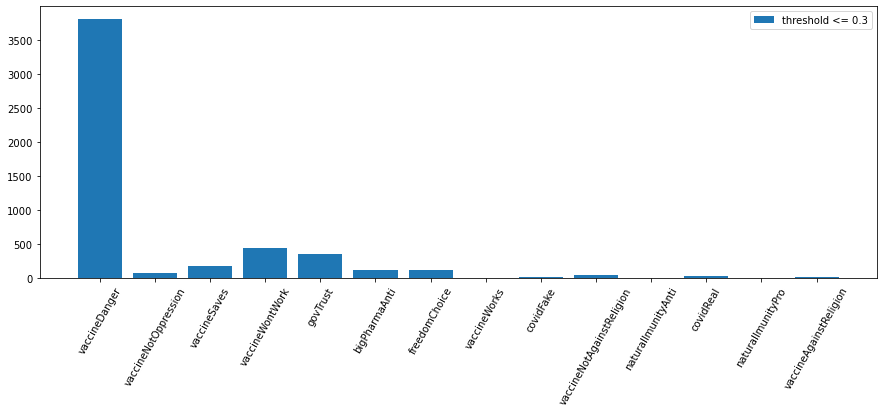

In [41]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
plt.xticks(rotation=60)
plt.bar(assigned_after_th.keys(), assigned_after_th.values(), label = 'threshold <= 0.3')
ax.legend(fontsize = 10)
plt.savefig('thr_0.3.png', dpi=300, bbox_inches = "tight") #will not chopped

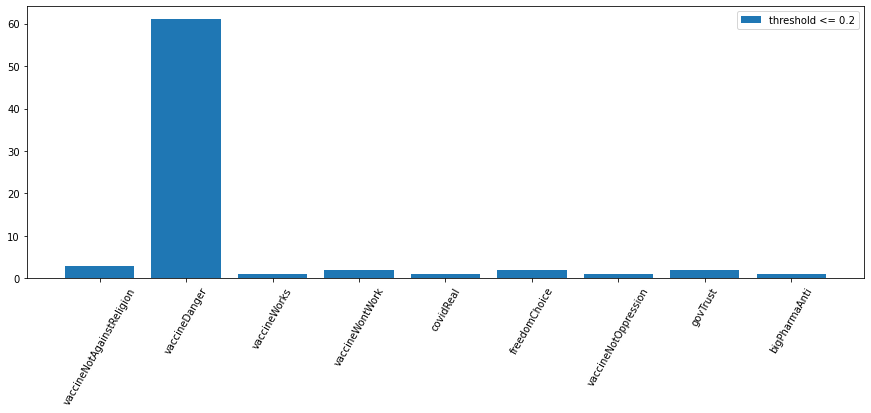

In [31]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
plt.xticks(rotation=60)
plt.bar(assigned_after_th.keys(), assigned_after_th.values(), label = 'threshold <= 0.2')
ax.legend(fontsize = 10)
plt.savefig('thr_0.2.png', dpi=300, bbox_inches = "tight") #will not chopped

# TSNE plot for clusters

In [32]:
data = [] 
target = []
themes = []
for k,v in theme_index_tweetEmbd_dic.items():
    themes.append(k)
    for i in range (0, len(v)):
        target.append(k)
        data.append(v[i][1])

In [33]:
from sklearn.manifold import TSNE
tSNE=TSNE(n_components=2, perplexity=40, n_iter=300)
tSNE_result=tSNE.fit_transform(data)

x=tSNE_result[:,0]
y=tSNE_result[:,1]

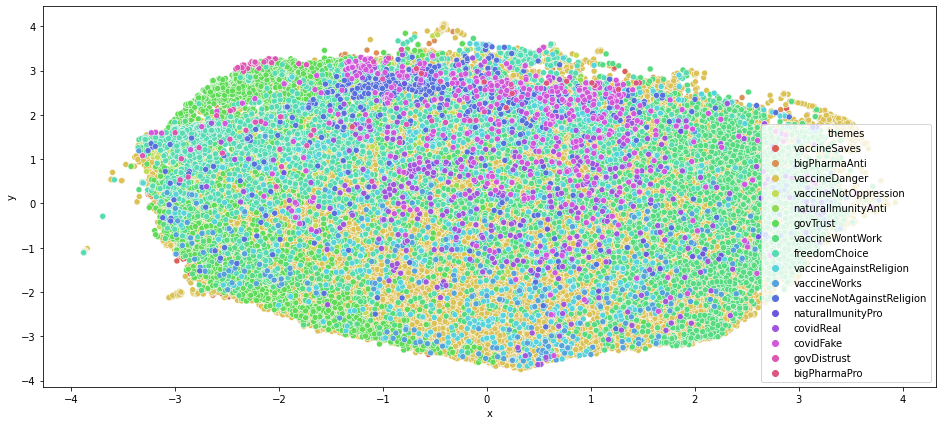

In [25]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data)
df['themes']=target
df['x']=x
df['y']=y

#df 
plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='themes',palette=sns.color_palette("hls",df.themes.nunique()),data=df,
               legend="full")

plt.savefig('tsne_thr_0.5.png', dpi=300, bbox_inches = "tight") #will not chopped #rename fig based on threshold
plt.show()

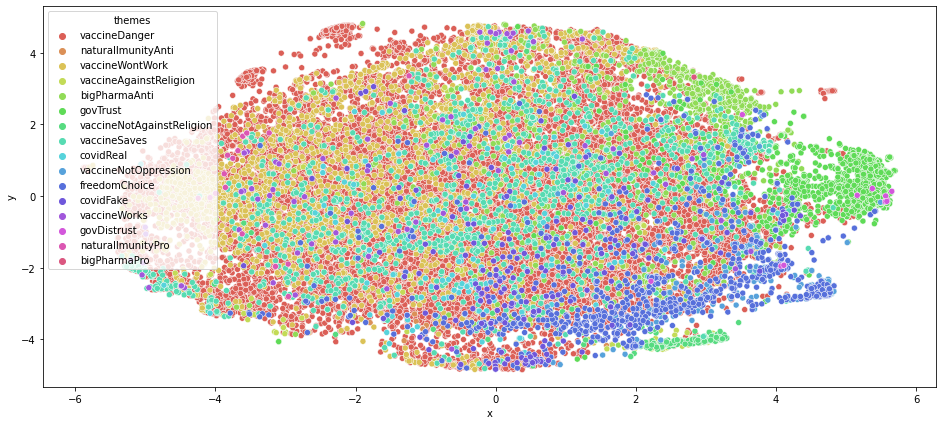

In [17]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data)
df['themes']=target
df['x']=x
df['y']=y

#df 
plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='themes',palette=sns.color_palette("hls",df.themes.nunique()),data=df,
               legend="full")

plt.savefig('tsne_thr_0.4.png', dpi=300, bbox_inches = "tight") #will not chopped #rename fig based on threshold
plt.show()

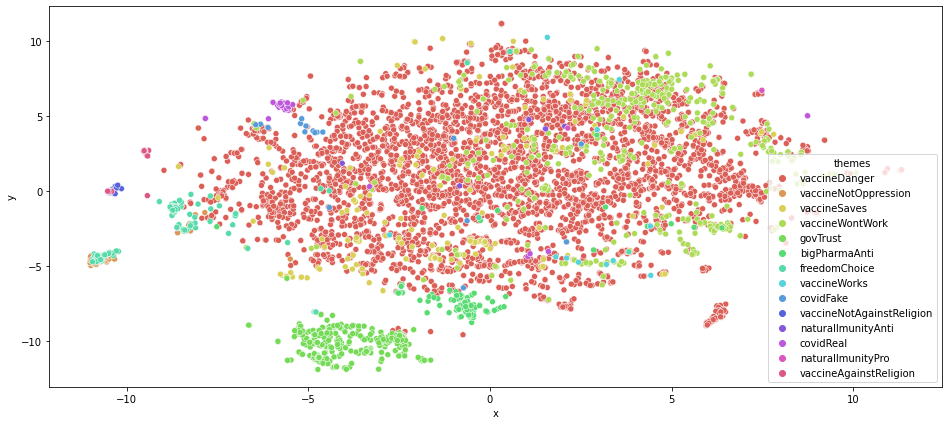

In [44]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data)
df['themes']=target
df['x']=x
df['y']=y

#df 
plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='themes',palette=sns.color_palette("hls",df.themes.nunique()),data=df,
               legend="full")

plt.savefig('tsne_thr_0.3.png', dpi=300, bbox_inches = "tight") #will not chopped #rename fig based on threshold
plt.show()

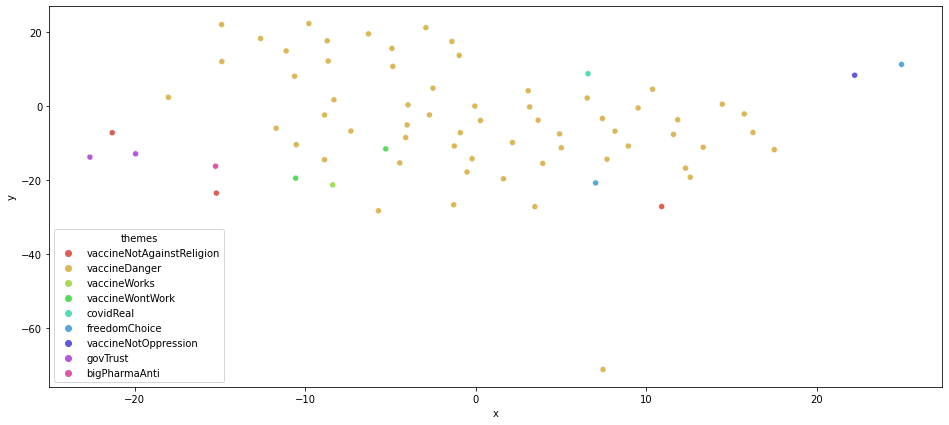

In [34]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data)
df['themes']=target
df['x']=x
df['y']=y

#df 
plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='themes',palette=sns.color_palette("hls",df.themes.nunique()),data=df,
               legend="full")

plt.savefig('tsne_thr_0.2.png', dpi=300, bbox_inches = "tight") #will not chopped #rename fig based on threshold
plt.show()